<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **HW2**
---


## **Problem 1 : KMeans Theory**

Given Kmeans Objective discussed in class with Euclidian distance 


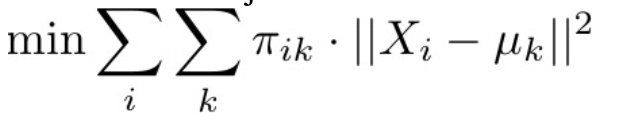



---

### **Section A**

prove that E step update on membership ($\pi$) achieves the minimum objective given the current centroids($\mu$) 




Proof By Contradiction:

Claim: 

  E step update on membership ( 𝜋 ) DOES NOT achieve the minimum objective given the current centroids( 𝜇 ). 
  

Proof:

  If E step update on membership ( 𝜋_k ) DOES NOT achieve the minimum objective given the current centroids( 𝜇_k ), then it means that the distance of some data points to 𝜇_k can be reduced by changing the cluster. If we change the cluster of the problematic data points, then we need to reclassify the data points to belong to some cluster ( 𝜋_j ). Since we are given the current centroid ( 𝜇_k) and that does not change, then we have a contradiction in definition, because we cannot measure the distance of data points classified to (𝜋_j) in relation to a centeroid belonging to an another cluster (𝜇_k).
  
  


---

### **Section B**


prove that M step update on centroids ($\mu$) achieves the minimum objective given the current memberships($\pi$) 



Proof: 

---

### **Section C**

Explain why KMeans has to stop (converge), but not necessarily to the global minimum objective value.





Explaination:

---


## **PROBLEM 2 : KMeans on data**

Using Euclidian distance or dot product similarity (choose one per dataset, you can try other similarity metrics)

A) run KMeans on the MNIST Dataset, try K=10

B) run KMeans on the FASHION Dataset, try K=10

C) run KMeans on the 20NG Dataset, try K=20

---


---
### **KMeans Implementation**

 Run KMeans on the MNIST Dataset, try K=10

In [13]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize

In [14]:
from sklearn.metrics import pairwise_distances_argmin_min 
# This function computes for each row in X, the index of the row of Y which is closest
#
# Returns
#
#   argmin : ndarray
#   Y[argmin[i], :] is the row in Y that is closest to X[i, :].
#
#   distances : ndarray
#   distances[i] is the distance between the i-th row in X and the argmin[i]-th row in Y.

---
Initiate random centoids

In [15]:
import random
k = 0
train_data = []

def init_rand_centoids(csr_matrix: train_data, int: k) -> dict :
  centoid_dict = {}
  for draft in range(k):
    seed = random.randint(0,len(train_data)-1)
    centoid_dict[draft] = train_data[seed]
  return centoid_dict

---
E Step - Assign clusters to centoids

In [16]:
centoid_dict = {}
train_data = []
def assign_cluster(csr_matrix: train_data,  dict: centoid_dict) -> [dict, list]:
  centoid_lst = []
  for centoid in centoid_dict.values():
    centoid_lst.append(centoid)
  centoid_nd_array = np.array(centoid_lst)
  cluster_tuple = pairwise_distances_argmin_min(train_data, centoid_nd_array)  
  
  clt = list(cluster_tuple[0])
  dstances =  list(cluster_tuple[1])
  cluster_dict = {}
  for ele in enumerate(clt):
    # print(ele[0])
    if not cluster_dict.get(ele[1]):
      cluster_dict[ele[1]] = []
    cluster_dict.get(ele[1]).append(ele[0])
    # print(cluster_dict[ele[1]])
  return [cluster_dict, dstances]

---
M Step - Get centoids that belong to each cluster

In [17]:
train_data =[]
cluster_dict = {}

def tune_centroid (csr_matrix: train_data, dict: cluster_dict) -> dict:
  centoid_dict = {}
  train_data.shape

  for cluster_key in cluster_dict.keys() :
    train_indices = cluster_dict.get(cluster_key)
    cluster_imgs = []

    for train_index in train_indices:
      cluster_imgs.append(train_data[train_index])
    centoid_dict[cluster_key] = np.sum(cluster_imgs, axis=0) / len(train_indices)

  return centoid_dict

In [19]:
cluster_dict = {}
train_label = []
gini_dict = {}

def evaluate_result (dict: cluster_dict, ndarray: train_label) :
  purity_sum = 0

  for c_key in cluster_dict.keys():
    c_lst = cluster_dict[c_key]
    label_lst = []
    for c_id in c_lst:
      label_lst.append(train_label[c_id])
      
    gini = 0 
    for label in label_lst:
      gini = gini +  ( ( label_lst.count(label) / len(label_lst) ) ** 2 )
    gini_dict [c_key] = gini

    most_freequent_label = max(set(label_lst), key = label_lst.count) 
    c_count = label_lst.count(most_freequent_label)
    
    # print('For cluster : ', c_key ,  ' | the most freequent label is : ', most_freequent_label, '| it appears : ', c_count)
    purity_sum += c_count

  print('\n\n')
  for key, val in gini_dict.items():
    print('Gini coefficient for cluster : ', key , '  | val :' , val)

  purity = purity_sum / len(train_label)
  print('Overall purity score is ', purity)
 

---
### **Section A**

 Run KMeans on the MNIST Dataset, try K=10

In [21]:
from keras.datasets import mnist 

# load fashion data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

# reshape and normalize
train_data = np.reshape(train_data, (60000, 784)) 
train_data = normalize(train_data, norm ='max')
test_data = np.reshape(test_data, (10000, 784))
test_data = normalize(test_data, norm ='max') 

# print(type(train_data))
train_data = np.concatenate([train_data, test_data])
train_label = np.concatenate([train_labels, test_labels])
print(train_data.shape)
print(train_label.shape)


(70000, 784)
(70000,)


In [22]:
k = 5
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1])
  print (updated_objective.shape)
  updated_objective = updated_objective.sum()
  
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective
  for key, val in cluster_dict.items():
    print('centoid_dict : ', key , '  | val :' , len(val) )
  print(objective)
  print ('\n')
  


print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)



(1, 70000)
centoid_dict :  2   | val : 9202
centoid_dict :  3   | val : 19449
centoid_dict :  0   | val : 28305
centoid_dict :  4   | val : 10624
centoid_dict :  1   | val : 2420
622908.4439552634


(1, 70000)
centoid_dict :  2   | val : 24832
centoid_dict :  0   | val : 10630
centoid_dict :  1   | val : 16258
centoid_dict :  3   | val : 12202
centoid_dict :  4   | val : 6078
469530.4721351591


(1, 70000)
centoid_dict :  1   | val : 10312
centoid_dict :  2   | val : 15707
centoid_dict :  0   | val : 22621
centoid_dict :  3   | val : 12835
centoid_dict :  4   | val : 8525
464482.39498831466


(1, 70000)
centoid_dict :  0   | val : 9707
centoid_dict :  1   | val : 16328
centoid_dict :  2   | val : 20761
centoid_dict :  3   | val : 13114
centoid_dict :  4   | val : 10090
461697.52779809956


(1, 70000)
centoid_dict :  3   | val : 13144
centoid_dict :  0   | val : 9127
centoid_dict :  1   | val : 17443
centoid_dict :  2   | val : 19413
centoid_dict :  4   | val : 10873
459864.7952669548



In [ ]:
k = 10
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  434115.67705973965



Gini coefficient for cluster :  0   | val : 1377.2423578115192
Gini coefficient for cluster :  1   | val : 4504.337913003147
Gini coefficient for cluster :  2   | val : 962.1804406375015
Gini coefficient for cluster :  3   | val : 3825.681211983401
Gini coefficient for cluster :  4   | val : 1246.5178987266847
Gini coefficient for cluster :  5   | val : 4054.340350335007
Gini coefficient for cluster :  6   | val : 415.8455544932614
Gini coefficient for cluster :  7   | val : 562.6013637865228
Gini coefficient for cluster :  8   | val : 3271.261589447847
Gini coefficient for cluster :  9   | val : 2021.9650903894094
Overall purity score is  0.5998142857142857


In [ ]:
k = 20
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  408317.56759190216



Gini coefficient for cluster :  0   | val : 1554.0919614571274
Gini coefficient for cluster :  1   | val : 2377.5294415586145
Gini coefficient for cluster :  2   | val : 464.7835881334652
Gini coefficient for cluster :  3   | val : 2477.605479369474
Gini coefficient for cluster :  4   | val : 351.7443769607674
Gini coefficient for cluster :  5   | val : 2250.6259456277476
Gini coefficient for cluster :  6   | val : 2945.184630402799
Gini coefficient for cluster :  7   | val : 295.72665829023686
Gini coefficient for cluster :  8   | val : 831.7366040903822
Gini coefficient for cluster :  9   | val : 661.3446743839871
Gini coefficient for cluster :  10   | val : 1996.4658319039709
Gini coefficient for cluster :  11   | val : 1939.897557541711
Gini coefficient for cluster :  12   | val : 2172.629122232412
Gini coefficient for cluster :  13   | val : 1551.94388732974
Gini coefficient for cluster :  14   | val : 2642.5932402082367
Gini co

---
### **Section B**

Run KMeans on the 20NG Dataset, try K=20

In [ ]:
from keras.datasets import fashion_mnist as fashion

# load fashion data
(train_data, train_labels) , (test_data, test_labels)= fashion.load_data()

# reshape and normalize
train_data = np.reshape(train_data, (60000, 784)) 
train_data = normalize(train_data, norm ='max')
test_data = np.reshape(test_data, (10000, 784))
test_data = normalize(test_data, norm ='max') 

# print(type(train_data))
train_data = np.concatenate([train_data, test_data])
train_label = np.concatenate([train_labels, test_labels])
print(train_data.shape)
print(train_label.shape)

4423680/4422102 [==============================] - 0s 0us/step
(70000, 784)
(70000,)


In [ ]:
# define number of clusters
k = 5

# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  427132.66836028086



Gini coefficient for cluster :  0   | val : 2350.99227556219
Gini coefficient for cluster :  1   | val : 1056.9678983532099
Gini coefficient for cluster :  2   | val : 2133.6888844443747
Gini coefficient for cluster :  3   | val : 1148.4970536781384
Gini coefficient for cluster :  4   | val : 1170.15100616798
Overall purity score is  0.41115714285714283


In [ ]:
# define number of clusters
k = 10

# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  385887.90370720264



Gini coefficient for cluster :  0   | val : 2856.0573725895465
Gini coefficient for cluster :  1   | val : 2248.8856969796498
Gini coefficient for cluster :  2   | val : 3043.8253923199427
Gini coefficient for cluster :  3   | val : 408.9461800575577
Gini coefficient for cluster :  4   | val : 724.8133712137652
Gini coefficient for cluster :  5   | val : 1204.366388448241
Gini coefficient for cluster :  6   | val : 3025.632713778935
Gini coefficient for cluster :  7   | val : 1281.9426134154776
Gini coefficient for cluster :  8   | val : 922.7123640022363
Gini coefficient for cluster :  9   | val : 2678.070044776625
Overall purity score is  0.5555428571428571


In [ ]:
# define number of clusters
k = 20

# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  353416.1212723756



Gini coefficient for cluster :  0   | val : 2640.6198151404055
Gini coefficient for cluster :  1   | val : 1995.273747730459
Gini coefficient for cluster :  2   | val : 449.4789791850624
Gini coefficient for cluster :  3   | val : 501.53329959568237
Gini coefficient for cluster :  4   | val : 575.2672779414726
Gini coefficient for cluster :  5   | val : 608.0964022793513
Gini coefficient for cluster :  6   | val : 3226.45947806499
Gini coefficient for cluster :  7   | val : 272.4132070506496
Gini coefficient for cluster :  8   | val : 1538.5822907181976
Gini coefficient for cluster :  9   | val : 1670.1193663766937
Gini coefficient for cluster :  10   | val : 1932.0768409177622
Gini coefficient for cluster :  11   | val : 2050.173995462941
Gini coefficient for cluster :  12   | val : 258.8283119938297
Gini coefficient for cluster :  13   | val : 334.65486401398
Gini coefficient for cluster :  14   | val : 2256.9252109676686
Gini coeff

---
### **Section C**

Run KMeans on the 20NG Dataset, try K=20


Import Training Data and normalize 

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
train_data = train_set.data
train_label = train_set.target
test_set = fetch_20newsgroups(subset='test')
test_data = test_set.data
test_label = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
train_data = vectorizer.fit_transform(train_data)
train_data = np.array(train_data.todense())

In [ ]:
k = 5
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  10944.979561792372



Gini coefficient for cluster :  0   | val : 11.920647881161425
Gini coefficient for cluster :  1   | val : 27.683125295652793
Gini coefficient for cluster :  2   | val : 21.879647677753592
Gini coefficient for cluster :  3   | val : 24.65755053507727
Gini coefficient for cluster :  4   | val : 20.295953216975416
Gini coefficient for cluster :  5   | val : 608.0964022793513
Gini coefficient for cluster :  6   | val : 3226.45947806499
Gini coefficient for cluster :  7   | val : 272.4132070506496
Gini coefficient for cluster :  8   | val : 1538.5822907181976
Gini coefficient for cluster :  9   | val : 1670.1193663766937
Gini coefficient for cluster :  10   | val : 1932.0768409177622
Gini coefficient for cluster :  11   | val : 2050.173995462941
Gini coefficient for cluster :  12   | val : 258.8283119938297
Gini coefficient for cluster :  13   | val : 334.65486401398
Gini coefficient for cluster :  14   | val : 2256.9252109676686
Gini co

In [ ]:
k = 10
cycles = 200
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  10918.217627384643



Gini coefficient for cluster :  0   | val : 14.216210249136969
Gini coefficient for cluster :  1   | val : 16.424401931867013
Gini coefficient for cluster :  2   | val : 54.0845928749765
Gini coefficient for cluster :  3   | val : 21.82955398623752
Gini coefficient for cluster :  4   | val : 120.98375703682404
Gini coefficient for cluster :  5   | val : 205.52649265951973
Gini coefficient for cluster :  6   | val : 64.6116166468491
Gini coefficient for cluster :  7   | val : 13.044798974961587
Gini coefficient for cluster :  8   | val : 7.0113566087592165
Gini coefficient for cluster :  9   | val : 8.382811948308737
Gini coefficient for cluster :  10   | val : 1932.0768409177622
Gini coefficient for cluster :  11   | val : 2050.173995462941
Gini coefficient for cluster :  12   | val : 258.8283119938297
Gini coefficient for cluster :  13   | val : 334.65486401398
Gini coefficient for cluster :  14   | val : 2256.9252109676686
Gini coe

In [ ]:
k = 20
cycles = 200
# define number of clusters
centoid_dict = init_rand_centoids(train_data, k)

# Run E and M steps to converge at local minimum
distances = []
updated_objective = 0
objective = 0
for j in range(200):
  assign_cluster_result = assign_cluster(train_data, centoid_dict)
  cluster_dict = assign_cluster_result[0]
  updated_objective = np.matrix(assign_cluster_result[1]).sum()
  centoid_dict = tune_centroid (train_data, cluster_dict)
  if (updated_objective == objective) : break
  else: objective = updated_objective

print('Objective after convergence : ', objective)
evaluate_result(cluster_dict, train_data)

Objective after convergence :  10869.32859308364



Gini coefficient for cluster :  0   | val : 177.4074635568511
Gini coefficient for cluster :  1   | val : 1.9053497942386823
Gini coefficient for cluster :  2   | val : 13.07001645136022
Gini coefficient for cluster :  3   | val : 10.030830416659601
Gini coefficient for cluster :  4   | val : 25.144933388337655
Gini coefficient for cluster :  5   | val : 45.01009587943649
Gini coefficient for cluster :  6   | val : 113.76048691465883
Gini coefficient for cluster :  7   | val : 33.30585793719171
Gini coefficient for cluster :  8   | val : 146.94139213449805
Gini coefficient for cluster :  9   | val : 2.2615580826867916
Gini coefficient for cluster :  10   | val : 18.831746715660714
Gini coefficient for cluster :  11   | val : 1.787589950763795
Gini coefficient for cluster :  12   | val : 1.5039087530437014
Gini coefficient for cluster :  13   | val : 2.719298245614034
Gini coefficient for cluster :  14   | val : 3.581564095673207
Gini 


---
## PROBLEM 3 : Gaussian Mixture on toy data

You are required to implemet the main EM loop, but can use math API/functions provided by your language to calculate normal densities, covariance matrix, etc.

---



### **Section A**

The gaussian 2-dim data on file  2gaussian.txt  has been generated  using a mixture  of  two Gaussians, each  2-dim, with the parameters below.

 Run the EM algorithm with random initial values to recover the parameters.

mean_1 [3,3]); cov_1 = [[1,0],[0,3]]; n1=2000 points

mean_2 =[7,4]; cov_2 = [[1,0.5],[0.5,1]]; ; n2=4000 points




In [5]:
infile = '/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/2gaussian.txt'
max_news_index = 0;

try:
  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  x = []
  for line in lines:
    if line:
      datapoint_vector = [float(line.split(' ')[0]), float(line.split(' ')[1])]
      x.append(datapoint_vector)
  print(x[0:20])
except:
  print('Oops there is an error when opening your file. ',
        'Make sure you the file exists in path!')

[[7.57104365461, 3.53027416598], [7.33721752493, 4.26271315755], [3.07182783367, 1.11801870519], [6.22685120927, 3.66748946389], [3.51314172738, 1.60312499421], [2.11414755757, 4.98438844756], [7.92122198492, 5.49139413264], [7.08129755568, 4.06805753461], [8.93635675202, 5.67349425456], [7.54226057103, 4.86329324512], [6.60967392524, 3.20500091301], [2.68660139089, 3.08696738391], [8.6551549341, 4.82722742644], [1.97686515357, 1.64769621376], [7.23889084689, 4.38458998599], [7.1404137765, 2.70856849413], [7.05016936874, 5.01188095893], [1.53571136067, 1.40995601545], [7.97817149325, 6.0186594126], [3.34282397412, 2.76778541412]]


---
$$
\large
p(\mathbf x | \mathbf\mu, \mathbf\Sigma) = \frac 1 {({2\pi})^{n/2}|\Sigma|^{1/2}}\exp\left(-\frac 1 2 (\mathbf x -\mathbf\mu)^T\mathbf\Sigma^{-1}(\mathbf x -\mathbf\mu)\right)
$$

In [ ]:

def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    base = np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5)
    exp = np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)
    return base * exp

---

$$cov_{x,y}=\frac{\sum(x_{i}-\bar{x})(y_{i}-\bar{y})}{N-1}$$





In [ ]:

x0 = np.array([7.57104365461, 3.53027416598], [7.33721752493, 4.26271315755], [3.07182783367, 1.11801870519])
mu = np.mean(x0, axis=0)
cov = np.dot((x0 - mu).T, x0 - mu) / (x0.shape[0] - 1)

y = gaussian(x0, mu=mu, cov=cov)
y